# **Data Understanding**

Dataset yang digunakan adalah **Pima Indians Diabetes Database** dari UCI/Kaggle.  
Dataset ini berisi data klinis pasien dengan atribut seperti jumlah kehamilan, kadar glukosa, tekanan darah, BMI, riwayat keluarga, dan label apakah pasien terdiagnosis diabetes.


## Eksplorasi Data
Tujuan eksplorasi data adalah memahami pola awal dari dataset:  
- **Distribusi variabel numerik** (contoh: Glucose, BloodPressure, BMI, Age).  
- **Perbandingan rata-rata antara pasien diabetes dan non-diabetes**.  
- **Pemeriksaan nilai anomali** (misalnya nilai 0 pada tekanan darah atau insulin yang seharusnya tidak mungkin).  
- **Korelasi antar fitur** untuk melihat variabel mana yang paling berkaitan dengan outcome.  

Contoh pertanyaan eksplorasi:
- Apakah pasien diabetes cenderung memiliki kadar glukosa lebih tinggi?  
- Apakah pasien dengan BMI tinggi lebih berisiko diabetes?  
- Bagaimana distribusi umur antara pasien diabetes dan non-diabetes?  

### Informasi Dataset
- Jumlah baris: 768  
- Jumlah kolom: 9 (8 fitur + 1 label)  
- Target variabel: `Outcome`  
  - 1 = pasien diabetes  
  - 0 = pasien tidak diabetes  

### Sumber Data
- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database




In [ ]:
!pip install pymysql

In [ ]:
import pymysql
import pandas as pd
from tabulate import tabulate

# Konfigurasi koneksi
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"
port = 19867
user = "avnadmin"
password = "AVNS_vnxDk9lOvZgFnuKlezN"
database = "psd"   # ✅ ganti ke database baru

# Buat koneksi
mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}
)

# Cek tabel
cursor = mysql_conn.cursor()
cursor.execute("SHOW TABLES;")
print("Tabel yang ada di database :", cursor.fetchall())


Tabel yang ada di database : (('diabetes_data',),)


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = int(os.getenv("DB_PORT"))  # ubah ke int
database = os.getenv("DB_NAME")

engine = create_engine(
    f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}?ssl=true"
)

# contoh query
df = pd.read_sql("SELECT * FROM diabetes_data LIMIT 5;", engine)
print(df.head())


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [ ]:

query = "SELECT * FROM diabetes_data LIMIT 5;"
df = pd.read_sql(query, mysql_conn)

mysql_conn.close()

print("5 baris pertama dari tabel diabetes_data:")
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


/tmp/ipython-input-2209621725.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mysql_conn)


5 baris pertama dari tabel diabetes_data:
+------+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|   id |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |   BMI |   DiabetesPedigreeFunction |   Age |   Outcome |
|------+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------|
|    1 |             6 |       148 |              72 |              35 |         0 |  33.6 |                      0.627 |    50 |         1 |
|    2 |             1 |        85 |              66 |              29 |         0 |  26.6 |                      0.351 |    31 |         0 |
|    3 |             8 |       183 |              64 |               0 |         0 |  23.3 |                      0.672 |    32 |         1 |
|    4 |             1 |        89 |              66 |              23 |        94 |  28.1 |              

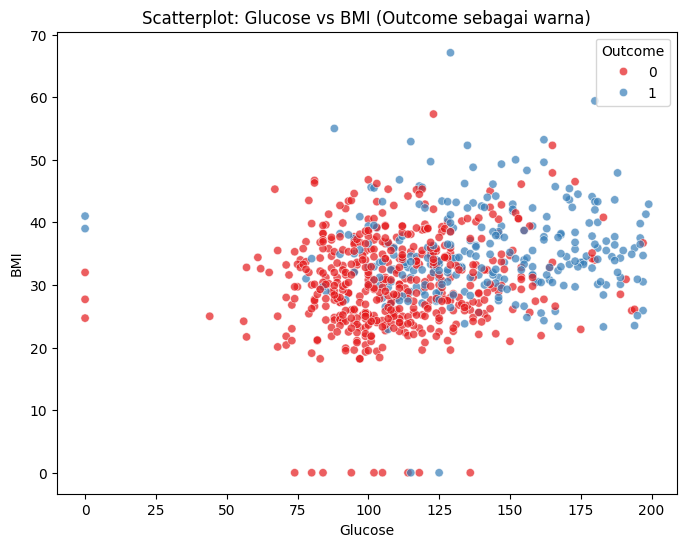

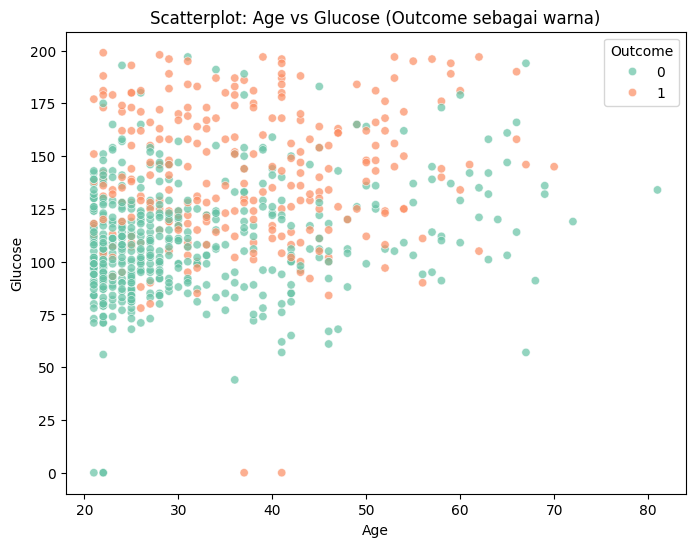

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome", palette="Set1", alpha=0.7)
plt.title("Scatterplot: Glucose vs BMI (Outcome sebagai warna)")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

# Scatterplot: Age vs Glucose
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Age", y="Glucose", hue="Outcome", palette="Set2", alpha=0.7)
plt.title("Scatterplot: Age vs Glucose (Outcome sebagai warna)")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()

In [ ]:
print("\nCek missing value:")
print(df.isnull().sum())


Cek missing value:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
